## Astronomy 534 "Extragalactic Universe" (Winter 2025)

### Illustris TNG simulation database

The Illustris TNG [suite of simulations](https://www.tng-project.org/about/) provides a large database of various halo and galaxy properties that we can use to illustrate our learning of galaxy formation.

Start with this main page for [data access](https://www.tng-project.org/data/). The description of all data fields is [here](https://www.tng-project.org/data/docs/specifications/).

[Examples of python scripts](https://www.tng-project.org/data/docs/scripts/) to analyze and plot the simulation data. I show some examples below.

You can also do analysis fully online using [JupyterLab notebooks](https://www.tng-project.org/data/lab/) but you would need to request your own access to them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

In [2]:
from illustris_python import illustris_python as il

Let's read a few of the (sub)halo fields (properties). The full list is [here](https://www.tng-project.org/data/docs/specifications/#sec2b).

In [3]:
basePath = './'

fields = ['SubhaloMass', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloGasMetallicity']

subhalos = il.groupcat.loadSubhalos(basePath, 135, fields=fields)

An example plot of the star formation rate vs. halo mass:

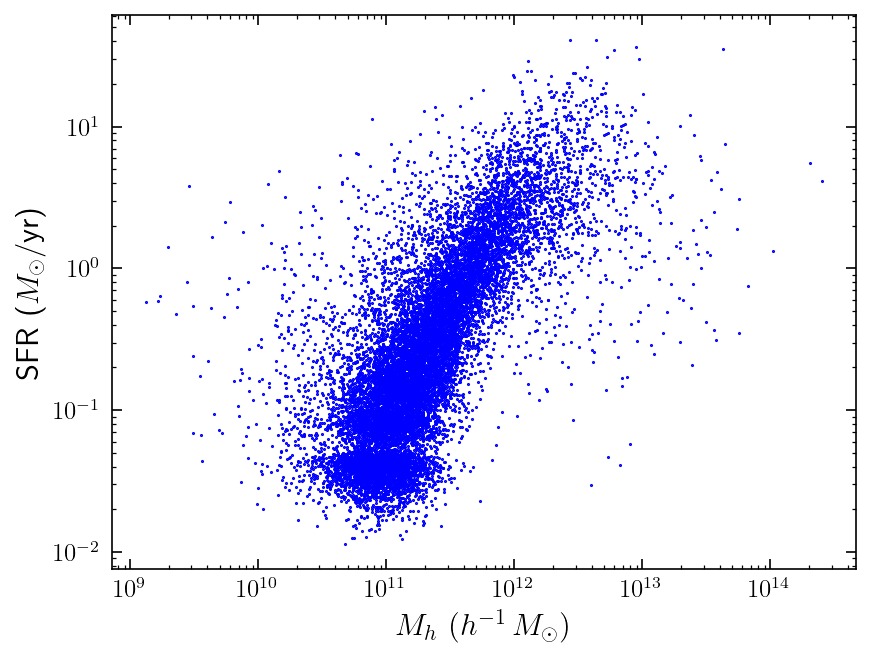

In [4]:
mh = subhalos['SubhaloMass'] * 1e10   # in Msun/h
sfr = subhalos['SubhaloSFRinRad']     # in Msun/yr

plt.plot(mh, sfr, '.', c='b', ms=1)

plt.xlabel(r'$M_h \ (h^{-1}\, M_\odot)$')
plt.ylabel(r'SFR ($M_\odot$/yr)')
plt.loglog();

The mass function of halos:

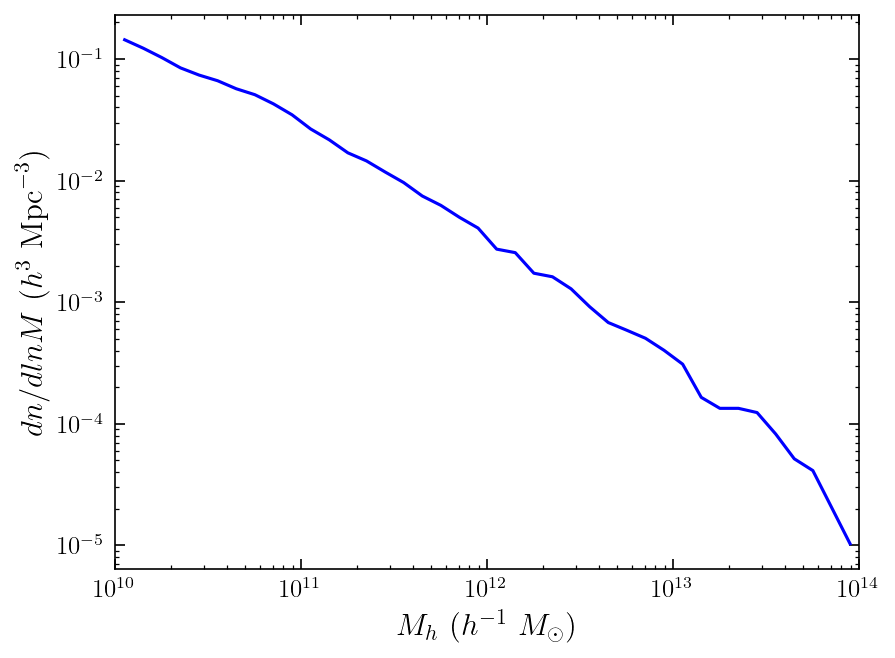

In [5]:
d = 0.1
mbins = np.arange(10, 14.1, d)
bins = 10.**mbins
m = 10.**(mbins[:-1] + d/2.)

dndM, bin_edges = np.histogram(mh, bins=bins, density=False)

# normalize the counts of halos by the volume of the simulation
Lbox = 75. # h^-1 Mpc, size of TNG100 box
dndM = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)

plt.plot(m, dndM, 'b')

plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.xlim(1e10, 1e14)
plt.loglog();

We can compare this distribution with the halo mass function provided by the [Colossus package](https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html) in its [Mass function module](
https://bdiemer.bitbucket.io/colossus/lss_mass_function.html#module-lss.mass_function).

In [6]:
# Planck 2018 cosmological parameters
h100 = 0.677
Om0 = 0.1424/h100**2
Ob0 = 0.0224/h100**2
ns = 0.967
sigma8 = 0.81
Tcmb0 = 2.726 # in K

In [7]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

cosmo = cosmology.setCosmology('my_cosmo',\
        {'flat':True, 'H0':100*h100, 'Om0':Om0, 'Ob0':Ob0, 'sigma8':sigma8, 'ns':ns})

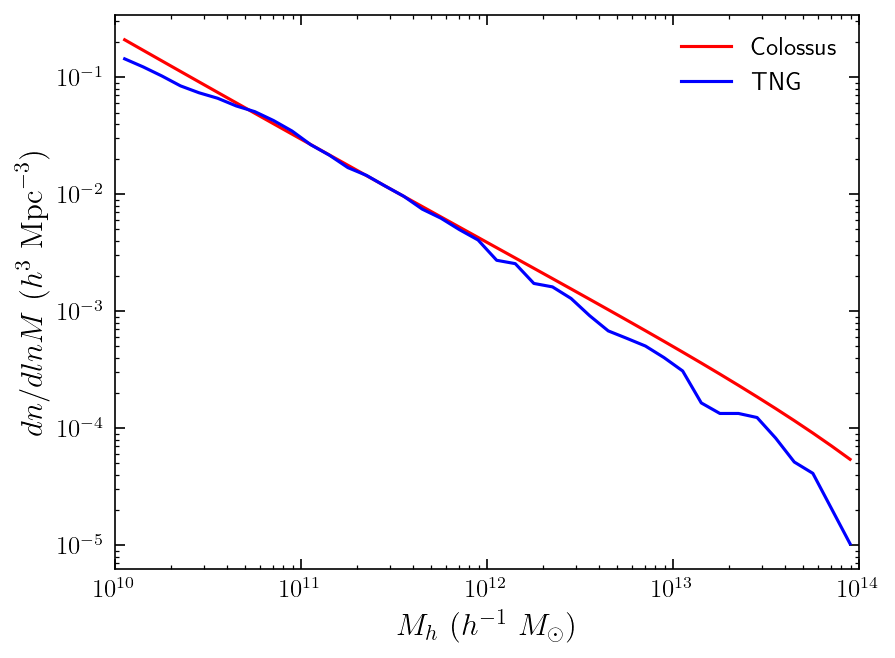

In [8]:
mf = mass_function.massFunction(m, 0., model = 'angulo12', q_out = 'dndlnM')
    
plt.plot(m, mf, 'r', label='Colossus')
plt.plot(m, dndM, 'b', label='TNG')

plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.xlim(1e10, 1e14)
plt.loglog()
plt.legend(loc='upper right');